In [66]:
import pandas as pd
import numpy as np
#import tensorflow.compat.v1 as tf
import tensorflow as tf
from tqdm import tqdm
from utils import *
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
## imputations
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
import fancyimpute
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode
#from midaspy import MIDAS

In [67]:
### loading the dataset
heart_df = pd.read_csv("heart.csv")

In [68]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [69]:
dataset_copy = heart_df.copy()
dataset_DL = heart_df.copy()

In [72]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [73]:
X = heart_df.drop("HeartDisease", axis = 1)
y = heart_df["HeartDisease"]

In [74]:
### using label encoder to convert categorical data to numeric data using label encoding
cols=  ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
label_encoders = {}

for i in cols:
    le = LabelEncoder()
    X[i] = le.fit_transform(X[i])
    label_encoders[i] = le

In [75]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [76]:
# splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state = 42)

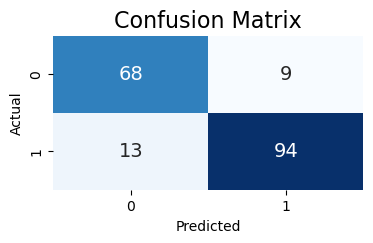

In [78]:
# Modelling and Evaluation metrics for complete dataset
model = RandomForestClassifier(n_estimators=200,random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)

# confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [79]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8804
Precision: 0.9126
Recall: 0.8785
F1 Score: 0.8952

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [80]:
accuracy

0.8804347826086957

## creating missing values - MCAR

In [83]:
## creating a copy of the dataset
data = X.copy()
target = y.copy()
#data = dataset.copy()

In [84]:
# Function produce_NA for generating missing values ------------------------------------------------------

def produce_NA(X, p_miss, mecha="MCAR", opt=None, p_obs=None, q=None)
    to_torch = torch.is_tensor(X) ## output a pytorch tensor, or a numpy array
    if not to_torch:
        X = X.astype(np.float32)
        X = torch.from_numpy(X)
    
    if mecha == "MAR":
        mask = MAR_mask(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "logistic":
        mask = MNAR_mask_logistic(X, p_miss, p_obs).double()
    else:
        mask = (torch.rand(X.shape) < p_miss).double()
    
    X_nas = X.clone()
    X_nas[mask.bool()] = np.nan
    
    return {'X_init': X.double(), 'X_incomp': X_nas.double(), 'mask': mask}

In [87]:
# Convert DataFrame to NumPy array
data_array = data.to_numpy()

# Now call the function with the NumPy array
data_MCAR = produce_NA(data_array, p_miss=0.25, mecha="MCAR")

# If you need to convert it back to a DataFrame after processing
data_MCAR_df = pd.DataFrame(data_MCAR['X_incomp'], columns=data.columns)

In [88]:
data_MCAR_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40.0,1.0,1.0,NaN,289.0,NaN,1.0,172.0,0.0,NaN,2.0
1,NaN,0.0,2.0,160.0,180.0,0.0,1.0,NaN,0.0,1.0,1.0
2,NaN,1.0,1.0,130.0,283.0,0.0,2.0,NaN,0.0,0.0,2.0
3,48.0,0.0,0.0,138.0,214.0,0.0,NaN,108.0,NaN,1.5,NaN
4,54.0,1.0,2.0,150.0,195.0,0.0,NaN,122.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,NaN
914,NaN,1.0,0.0,144.0,193.0,NaN,1.0,141.0,NaN,NaN,1.0
915,57.0,1.0,NaN,130.0,131.0,0.0,1.0,115.0,NaN,NaN,1.0
916,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,NaN,0.0,1.0


In [89]:
data.shape

(918, 11)

In [90]:
#count of missing values
data_MCAR_df.isna().sum()

Age               239
Sex               261
ChestPainType     238
RestingBP         228
Cholesterol       232
FastingBS         209
RestingECG        236
MaxHR             245
ExerciseAngina    240
Oldpeak           251
ST_Slope          228
dtype: int64

Text(0.5, 1.0, 'Missing Data Patterns (Original)')

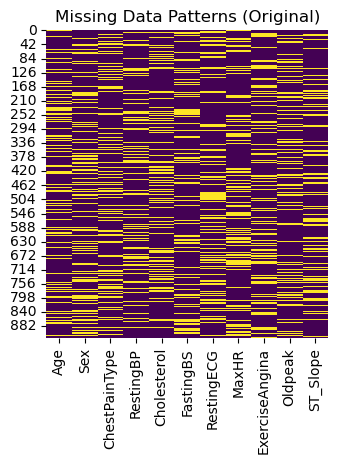

In [91]:
#visualise missing values
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.heatmap(data_MCAR_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Patterns (Original)')

In [92]:
#percentage of missing values
print("Percentage of newly generated missing values: ", (data_MCAR['mask'].sum()).numpy()/np.prod(data_MCAR['mask'].size())*100, " %")

Percentage of newly generated missing values:  25.816993464052292  %


# Simple Imputation

In [97]:
data_MCAR_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40.0,1.0,1.0,NaN,289.0,NaN,1.0,172.0,0.0,NaN,2.0
1,NaN,0.0,2.0,160.0,180.0,0.0,1.0,NaN,0.0,1.0,1.0
2,NaN,1.0,1.0,130.0,283.0,0.0,2.0,NaN,0.0,0.0,2.0
3,48.0,0.0,0.0,138.0,214.0,0.0,NaN,108.0,NaN,1.5,NaN
4,54.0,1.0,2.0,150.0,195.0,0.0,NaN,122.0,0.0,0.0,2.0


In [98]:
data_MCAR_simple_imput = data_MCAR_df.copy()

In [99]:
mean_columns = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
column_mean = data_MCAR_simple_imput[mean_columns].mean()

In [100]:
column_mean

Age             53.589102
RestingBP      132.431884
Cholesterol    200.061224
FastingBS        0.234133
MaxHR          135.570579
Oldpeak          0.876762
dtype: float64

In [101]:
mode_columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
column_mode = data_MCAR_simple_imput[mode_columns].mode().iloc[0] 

In [102]:
column_mode

Sex               1.0
ChestPainType     0.0
RestingECG        1.0
ExerciseAngina    0.0
ST_Slope          1.0
Name: 0, dtype: float64

In [103]:
# imputing numerical values with mean and categorical values with mode
data_MCAR_simple_imput[mean_columns] = data_MCAR_simple_imput[mean_columns].fillna(column_mean)
data_MCAR_simple_imput[mode_columns] = data_MCAR_simple_imput[mode_columns].fillna(column_mode)

In [104]:
data_MCAR_simple_imput.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40.000000,1.0,1.0,132.431884,289.0,0.234133,1.0,172.000000,0.0,0.876762,2.0
1,53.589102,0.0,2.0,160.000000,180.0,0.000000,1.0,135.570579,0.0,1.000000,1.0
2,53.589102,1.0,1.0,130.000000,283.0,0.000000,2.0,135.570579,0.0,0.000000,2.0
3,48.000000,0.0,0.0,138.000000,214.0,0.000000,1.0,108.000000,0.0,1.500000,1.0
4,54.000000,1.0,2.0,150.000000,195.0,0.000000,1.0,122.000000,0.0,0.000000,2.0


In [105]:
X = data_MCAR_simple_imput
y = target

In [106]:
# splitting imputed dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state = 42)

In [107]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,53.589102,1.0,2.0,132.431884,240.000000,1.000000,1.0,194.000000,0.0,0.876762,1.0
25,53.589102,1.0,0.0,130.000000,209.000000,0.234133,1.0,178.000000,0.0,0.000000,2.0
84,53.589102,1.0,0.0,132.431884,200.061224,1.000000,1.0,125.000000,1.0,1.000000,1.0
10,37.000000,0.0,2.0,130.000000,211.000000,0.234133,1.0,142.000000,0.0,0.876762,2.0
344,51.000000,1.0,0.0,120.000000,0.000000,1.000000,1.0,135.570579,0.0,0.876762,1.0


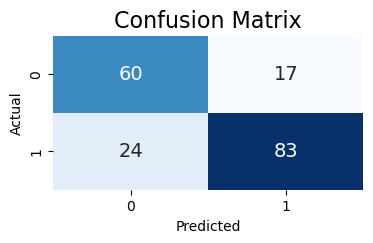

In [108]:
# Modelling and Evaluation metrics for imputed dataset
model = RandomForestClassifier(n_estimators=200,random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cf_matrix_simple_impute = confusion_matrix(y_test,y_pred)

# confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cf_matrix_simple_impute, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

accuracy_simple_impute = accuracy_score(y_test,y_pred)
precision_simple_impute = precision_score(y_test, y_pred)
recall_simple_impute = recall_score(y_test, y_pred)
f1_simple_impute = f1_score(y_test, y_pred)

In [109]:
print(f'Accuracy: {accuracy_simple_impute:.4f}')
print(f'Precision: {precision_simple_impute:.4f}')
print(f'Recall: {recall_simple_impute:.4f}')
print(f'F1 Score: {f1_simple_impute:.4f}')

Accuracy: 0.7772
Precision: 0.8300
Recall: 0.7757
F1 Score: 0.8019


In [110]:
accuracy_simple_impute

0.7771739130434783

# KNN

In [112]:
data_MCAR_knn = data_MCAR_df.copy()

In [113]:
data_MCAR_knn.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40.0,1.0,1.0,NaN,289.0,NaN,1.0,172.0,0.0,NaN,2.0
1,NaN,0.0,2.0,160.0,180.0,0.0,1.0,NaN,0.0,1.0,1.0
2,NaN,1.0,1.0,130.0,283.0,0.0,2.0,NaN,0.0,0.0,2.0
3,48.0,0.0,0.0,138.0,214.0,0.0,NaN,108.0,NaN,1.5,NaN
4,54.0,1.0,2.0,150.0,195.0,0.0,NaN,122.0,0.0,0.0,2.0


In [114]:
data_MCAR_knn.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [115]:
data_MCAR_knn.isna().sum()

Age               239
Sex               261
ChestPainType     238
RestingBP         228
Cholesterol       232
FastingBS         209
RestingECG        236
MaxHR             245
ExerciseAngina    240
Oldpeak           251
ST_Slope          228
dtype: int64

In [116]:
# function to evaluate different k values for optimal k
def evaluate_knn_imputation(k_values, X, y):
    results = {}
    for k in k_values:
        knn_imputer = KNNImputer(n_neighbors=k)
        X_imputed = knn_imputer.fit_transform(X)
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=1)
        
        # Train and evaluate the model on imputed data
        rf_clf = RandomForestClassifier(random_state=42)
        rf_clf.fit(X_train, y_train)
        
        # Evaluate the model using cross-validation
        scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
        results[k] = scores.mean()
    return results

# Evaluate different k values
k_values = range(1, 21)
results = evaluate_knn_imputation(k_values, data_MCAR_knn, y)

# best k value
best_k = max(results, key=results.get)
print(f'Best k value: {best_k} with accuracy: {results[best_k]}')

Best k value: 13 with accuracy: 0.848802534712515


In [117]:
results

{1: 0.8065417948001118,
 2: 0.816093560711956,
 3: 0.8283850526511974,
 4: 0.8283664150591743,
 5: 0.8365389991613084,
 6: 0.8297269592768615,
 7: 0.8351598173515982,
 8: 0.8365389991613084,
 9: 0.8324480477122356,
 10: 0.8379181809710186,
 11: 0.8420091324200915,
 12: 0.8460907650731524,
 13: 0.848802534712515,
 14: 0.8419904948280683,
 15: 0.8338458671139689,
 16: 0.8324387289162241,
 17: 0.847441990494828,
 18: 0.8406485882024043,
 19: 0.8392694063926941,
 20: 0.8474326716988166}

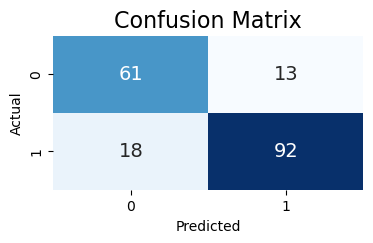

In [118]:
# imputing data by taking best k value
knn_imputer = KNNImputer(n_neighbors=best_k)
X_imputed_best = knn_imputer.fit_transform(data_MCAR_knn)

# Split the data using the imputed dataset with the best k
X_train, X_test, y_train, y_test = train_test_split(X_imputed_best, y, test_size=0.2, random_state=1)

# Modelling and Evaluation metrics for imputed dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cf_matrix_knn_impute = confusion_matrix(y_test,y_pred)

# confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cf_matrix_knn_impute, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

accuracy_knn_impute = accuracy_score(y_test,y_pred)
precision_knn_impute = precision_score(y_test, y_pred)
recall_knn_impute = recall_score(y_test, y_pred)
f1_knn_impute = f1_score(y_test, y_pred)


In [119]:
print(f'Accuracy: {accuracy_knn_impute:.4f}')
print(f'Precision: {precision_knn_impute:.4f}')
print(f'Recall: {recall_knn_impute:.4f}')
print(f'F1 Score: {f1_knn_impute:.4f}')

Accuracy: 0.8315
Precision: 0.8762
Recall: 0.8364
F1 Score: 0.8558


# MICE

In [47]:
## MICE imputation
data_MCAR_mice = data_MCAR_df.copy()
data_MCAR_mice.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40.0,1.0,1.0,NaN,NaN,NaN,1.0,172.0,NaN,0.0,2.0
1,49.0,0.0,2.0,160.0,180.0,0.0,NaN,156.0,0.0,1.0,1.0
2,37.0,1.0,NaN,130.0,NaN,0.0,2.0,98.0,0.0,0.0,2.0
3,48.0,0.0,NaN,NaN,214.0,0.0,1.0,108.0,NaN,NaN,1.0
4,54.0,1.0,NaN,NaN,195.0,0.0,NaN,NaN,NaN,0.0,2.0


In [51]:
#evaluate optimal iterations for mice
def evaluate_mice_imputation(max_iter_values, X, y):
    results_mice = {}
    for max_iter in max_iter_values:
        # Initialize the MICE imputer with different max_iter values
        mice_imputer = IterativeImputer(max_iter=max_iter, random_state=42)
        X_imputed = mice_imputer.fit_transform(X)
        
        # Split the imputed data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=1)
        
        # Train and evaluate a model on the imputed data
        rf_clf = RandomForestClassifier(random_state=42)
        rf_clf.fit(X_train, y_train)
        
        # Evaluate the model using cross-validation
        scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
        results_mice[max_iter] = scores.mean()
    
    return results_mice

# List of max_iter values to evaluate
max_iter_values = range(1, 21)

results_mice = evaluate_mice_imputation(max_iter_values, data_MCAR_mice, y)

# best iteration value
best_max_iter = max(results_mice, key=results.get)
print(f'Best iter value: {best_max_iter} with accuracy: {results_mice[best_max_iter]}')

/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Best iter value: 13 with accuracy: 0.8106327462491846


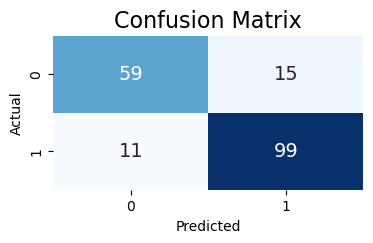

In [53]:
# imputing data by taking best iteration value
mice_imputer = IterativeImputer(max_iter=best_max_iter, random_state=42)
X_imputed_best = mice_imputer.fit_transform(data_MCAR_mice)

# Split the data using the imputed dataset with the best max_iter
X_train, X_test, y_train, y_test = train_test_split(X_imputed_best, y, test_size=0.2, random_state=1)

# Modelling and Evaluation metrics for imputed dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cf_matrix_mice_impute = confusion_matrix(y_test,y_pred)

# confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cf_matrix_mice_impute, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

accuracy_mice_impute = accuracy_score(y_test,y_pred)
precision_mice_impute = precision_score(y_test, y_pred)
recall_mice_impute = recall_score(y_test, y_pred)
f1_mice_impute = f1_score(y_test, y_pred)

In [54]:
print(f'Accuracy: {accuracy_mice_impute:.4f}')
print(f'Precision: {precision_mice_impute:.4f}')
print(f'Recall: {recall_mice_impute:.4f}')
print(f'F1 Score: {f1_mice_impute:.4f}')

Accuracy: 0.8587
Precision: 0.8684
Recall: 0.9000
F1 Score: 0.8839


# Expectation - Maximization

In [55]:
data_MCAR_EM = data_MCAR_df.copy()

In [56]:
# masking matrix of missing values
missing_mask = np.isnan(data_MCAR_EM)
print(missing_mask)

       Age    Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    False  False          False       True         True       True   
1    False  False          False      False        False      False   
2    False  False           True      False         True      False   
3    False  False           True       True        False      False   
4    False  False           True       True        False      False   
..     ...    ...            ...        ...          ...        ...   
913  False  False          False      False        False      False   
914  False  False          False      False        False      False   
915  False  False           True      False        False       True   
916  False   True          False       True        False       True   
917  False  False           True      False        False      False   

     RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0         False  False            True    False     False  
1          True  False     

In [122]:
#taking 2 GMM components
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=0)

In [123]:
# initially imputing with mean values and fitting GMM
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [124]:
gmm.fit(X_imputed)

GaussianMixture(n_components=2, random_state=0)

In [60]:
def impute_missing_values(X, gmm):
    # Ensure X is a NumPy array
    X_complete = X.values if isinstance(X, pd.DataFrame) else X.copy()
    #X_complete = X.copy()
    missing_indices = np.isnan(X_complete)

    # Predict missing values
    for feature in range(X_complete.shape[1]):
        if np.any(missing_indices[:, feature]):
            # Mask for missing values in the current feature
            mask = missing_indices[:, feature]
            # Predict using the GMM
            sampled_values, _ = gmm.sample(sum(mask))
            X_complete[mask, feature] = sampled_values[:, feature]

    return X_complete

# Ensure that X_scaled is a NumPy array before calling the function
X_imputed = impute_missing_values(X, gmm)

In [61]:
#converting numpy array to dataframe
imputed_data = pd.DataFrame(X_imputed, columns=X.columns)

In [62]:
imputed_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40.0,1.0,1.0,132.410029,197.737659,0.240525,1.0,172.000000,0.0,0.000000,2.0
1,49.0,0.0,2.0,160.000000,180.000000,0.000000,1.0,156.000000,0.0,1.000000,1.0
2,37.0,1.0,0.0,130.000000,197.737659,0.000000,2.0,98.000000,0.0,0.000000,2.0
3,48.0,0.0,0.0,132.410029,214.000000,0.000000,1.0,108.000000,0.0,0.892996,1.0
4,54.0,1.0,0.0,132.410029,195.000000,0.000000,1.0,137.627424,0.0,0.000000,2.0


In [63]:
imputed_data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [64]:
X = imputed_data
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state = 42)

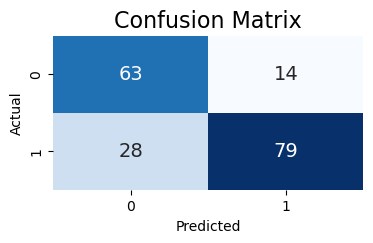

In [65]:
# Modelling and Evaluation metrics for imputed dataset
model = RandomForestClassifier(n_estimators=200,random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cf_matrix_EM = confusion_matrix(y_test,y_pred)

# confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cf_matrix_EM, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

accuracy_EM = accuracy_score(y_test,y_pred)
precision_EM = precision_score(y_test, y_pred)
recall_EM = recall_score(y_test, y_pred)
f1_EM = f1_score(y_test, y_pred)

In [68]:
print(f'Accuracy: {accuracy_EM:.4f}')
print(f'Precision: {precision_EM:.4f}')
print(f'Recall: {recall_EM:.4f}')
print(f'F1 Score: {f1_EM:.4f}')

Accuracy: 0.7717
Precision: 0.8495
Recall: 0.7383
F1 Score: 0.7900


# Deep learning approach

## GAIN

In [70]:
# Necessary packages

def normalization(data):
    '''Normalize data in [0, 1] range  '''

    # Parameters
    _, dim = data.shape
    norm_data = data.copy()

    # MixMax normalization
    min_val = np.zeros(dim)
    max_val = np.zeros(dim)

    # For each dimension
    for i in range(dim):
        min_val[i] = np.nanmin(norm_data[:, i])
        norm_data[:, i] = norm_data[:, i] - np.nanmin(norm_data[:, i])
        max_val[i] = np.nanmax(norm_data[:, i])
        norm_data[:, i] = norm_data[:, i] / (np.nanmax(norm_data[:, i]) + 1e-6)

        # Return norm_parameters for renormalization
    norm_parameters = {'min_val': min_val,
                       'max_val': max_val}

    return norm_data, norm_parameters


def renormalization(norm_data, norm_parameters):
    '''Renormalize data from [0, 1] range to the original range.  '''

    min_val = norm_parameters['min_val']
    max_val = norm_parameters['max_val']

    _, dim = norm_data.shape
    renorm_data = norm_data.copy()

    for i in range(dim):
        renorm_data[:, i] = renorm_data[:, i] * (max_val[i] + 1e-6)
        renorm_data[:, i] = renorm_data[:, i] + min_val[i]

    return renorm_data


def rounding(imputed_data, data_x):
    '''Round imputed data for categorical variables.  '''

    _, dim = data_x.shape
    rounded_data = imputed_data.copy()

    for i in range(dim):
        temp = data_x[~np.isnan(data_x[:, i]), i]
        # Only for the categorical variable
        if len(np.unique(temp)) < 10:
            rounded_data[:, i] = np.round(rounded_data[:, i])

    return rounded_data


def rmse_loss(ori_data, imputed_data, data_m):
    '''Compute RMSE loss between ori_data and imputed_data  '''

    ori_data, _ = normalization(ori_data)
    imputed_data, _ = normalization(imputed_data)

    # Only for missing values
    nominator = np.sum(((1 - data_m) * ori_data - (1 - data_m) * imputed_data) ** 2)
    denominator = np.sum(1 - data_m)

    rmse = np.sqrt(nominator / float(denominator))

    return rmse


def xavier_init(size):
    '''Xavier initialization.  '''
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random.normal(shape=size, stddev=xavier_stddev)


def binary_sampler(p, rows, cols):
    '''Sample binary random variables.  '''
    unif_random_matrix = np.random.uniform(0., 1., size=[rows, cols])
    binary_random_matrix = 1 * (unif_random_matrix < p)
    return binary_random_matrix.astype('float32')


def uniform_sampler(low, high, rows, cols):
    '''Sample uniform random variables.  '''
    return np.random.uniform(low, high, size=[rows, cols]).astype('float32')


def uniform_categorical_sampler(n_classes, rows):
    return np.array([np.random.choice(n, rows) for n in n_classes]).T

def sample_batch_index(total, batch_size):
    '''Sample index of the mini-batch.  '''
    total_idx = np.random.permutation(total)
    batch_idx = total_idx[:batch_size]
    return batch_idx

def initial_imputation(data_raw, cat_index, num_index):
    data = data_raw.copy()
    # replace nan in categorical variable by the most frequent value
    if cat_index:
        common_value = np.apply_along_axis(lambda x: np.bincount(x[~np.isnan(x)].astype(np.int64)).argmax(), 0,
                                           data[:, cat_index])
        for j in range(len(cat_index)):
            data[np.isnan(data[:, cat_index[j]]), cat_index[j]] = common_value[j]
    # replace nan in numerical variable by its mean
    if num_index:
        mean_value = np.nanmean(data[:, num_index], axis=0)
        for j in range(len(num_index)):
            data[np.isnan(data[:, num_index[j]]), num_index[j]] = mean_value[j]
    return data

def onehot_encoding(data, data_m, all_levels, has_miss=False):
    no, dim = data.shape

    data_filled = np.nan_to_num(data.copy(), 0)
    data_enc = np.empty(shape=(no, np.sum([len(x) for x in all_levels])), dtype=np.float32)
    data_m_enc = np.empty(shape=(no, np.sum([len(x) for x in all_levels])), dtype=np.float32)
    col_idx = 0
    for j in range(dim):
        colj_nlevel = len(all_levels[j])
        colj = data_filled[:, j].astype(np.int64)
        miss_j = np.repeat(data_m[:, j].reshape([-1, 1]), colj_nlevel,axis=1)
        enc_j = np.eye(colj_nlevel)[colj]
        if has_miss:
            enc_j[miss_j == 0] = np.nan
        data_enc[:, col_idx:(col_idx+colj_nlevel)] = enc_j
        data_m_enc[:, col_idx:(col_idx + colj_nlevel)] = miss_j
        col_idx += colj_nlevel
    return data_enc, data_m_enc

def onehot_decoding(data_enc, data_m_enc, all_levels, has_miss=False):
    col_idx = 0
    no = data_enc.shape[0]
    dim = len(all_levels)

    miss_enc = data_m_enc
    data = np.empty(shape=(no, dim), dtype=np.float32)
    for j in range(dim):
        colj_level = len(all_levels[j])
        data_enc_j = data_enc[:, col_idx:(col_idx + colj_level)]
        data_j = np.argmax(data_enc_j, axis=1).astype(np.float32)
        data_m_j = miss_enc[:, col_idx]
        if has_miss:
            data_j[data_m_j == 0] = np.nan
        data[:, j] = data_j
        col_idx += colj_level
    return data

def get_bins_from_numerical(num_df, bins):
    data_bin_ls = []
    for i in range(len(bins)):
        col = num_df.columns[i]
        data_bin_ls.append(pd.cut(num_df[col], bins=bins[i], labels = False))
    data_bin_df = pd.concat(data_bin_ls, axis=1)
    return data_bin_df


def table_to_latex(mar_table, bias_table, metric_name, variable_type, float_format = "%.2e", save_mode = "w", save_loc = 'mytable.tex', percentage=False):
    tex_table = pd.concat({'Marginal':mar_table, 'Bivariate':bias_table}, axis=1)
    if percentage:
        tex_table *= 100
    tex_table = tex_table.rename(index={0.10: "10%",
                            0.25: "25%",
                            0.50: "50%",
                            0.75: "75%",
                            0.90: "90%"})
    with open(save_loc, save_mode) as tf:
        tex = tex_table.to_latex(float_format = float_format,
                              multicolumn_format = "c",
                              #label = "",
                              caption = "Distributions of {} for {} variables when $n=10000$ and 30\% values MCAR.".format(metric_name, variable_type))
        # tex = tex.replace('\\midrule', '\\hline\n\\midrule')
        # tex = tex.replace('\\bottomrule', '\\bottomrule\n\\hline')
        # tex = tex.replace('{lrrrrrrrr}', '{lrrrrrrrr}\n\hline\hline')
        tex = tex.replace('{Bivariate} \\\\', '{Bivariate} \\\\\n\cline{2-9}')
        tf.write(tex + "\n")

In [71]:
# Necessary packages
# GAIN -> Generative Adversial Imputation Network
def gain (data_x, data_m, cat_index, num_index, all_levels, gain_parameters, num_imputations=10):
    # System parameters
    batch_size = gain_parameters['batch_size']
    hint_rate = gain_parameters['hint_rate']
    alpha = gain_parameters['alpha']
    iterations = gain_parameters['iterations']

    data_train = np.array([])
    data_train_m = np.array([])
    # preprocess categorical variables
    if cat_index:
        data_cat = data_x[:, cat_index]
        data_cat_m = data_m[:, cat_index]
        data_cat_enc, data_cat_enc_miss = onehot_encoding(data_cat, data_cat_m, all_levels, has_miss=True)
        data_cat_enc = np.nan_to_num(data_cat_enc, 0)
        data_train = data_cat_enc
        data_train_m = data_cat_enc_miss
        n_classes = list(map(lambda x: len(x), all_levels))
    # preprocess numerical variables
    if num_index:
        data_num = data_x[:, num_index]
        data_num_m = data_m[:, num_index]
        data_num_norm, norm_parameters = normalization(data_num)
        data_num_norm = np.nan_to_num(data_num_norm, 0)
        data_train = np.concatenate([data_train, data_num_norm], axis=1) if data_train.size else data_num_norm
        data_train_m = np.concatenate([data_train_m, data_num_m], axis=1) if data_train_m.size else data_num_m

    # Other parameters
    no, dim = data_x.shape
    input_dim = data_train.shape[1]

    # Hidden state dimensions
    h_Gdim = int(input_dim)
    h_Ddim = int(input_dim)

    ## GAIN architecture
    # Discriminator variables
    D_W1 = tf.Variable(xavier_init([input_dim*2, h_Ddim])) # Data + Hint as inputs
    D_b1 = tf.Variable(tf.zeros(shape = [h_Ddim]))

    D_W2 = tf.Variable(xavier_init([h_Ddim, h_Ddim]))
    D_b2 = tf.Variable(tf.zeros(shape = [h_Ddim]))

    D_W3 = tf.Variable(xavier_init([h_Ddim, input_dim]))
    D_b3 = tf.Variable(tf.zeros(shape = [input_dim]))  # Multi-variate outputs

    theta_D = [D_W1, D_W2, D_W3, D_b1, D_b2, D_b3]

    #Generator variables
    # Data + Mask as inputs (Random noise is in missing components)
    G_W1 = tf.Variable(xavier_init([input_dim*2, h_Gdim]))
    G_b1 = tf.Variable(tf.zeros(shape = [h_Gdim]))

    G_W2 = tf.Variable(xavier_init([h_Gdim, h_Gdim]))
    G_b2 = tf.Variable(tf.zeros(shape = [h_Gdim]))

    G_W3 = tf.Variable(xavier_init([h_Gdim, input_dim]))
    G_b3 = tf.Variable(tf.zeros(shape = [input_dim]))

    theta_G = [G_W1, G_W2, G_W3, G_b1, G_b2, G_b3]

    ## GAIN functions
    # Generator
    @tf.function
    def generator(x,m):
        # Concatenate Mask and Data
        inputs = tf.concat(values = [x, m], axis = 1)
        G_h1 = tf.nn.leaky_relu(tf.matmul(inputs, G_W1) + G_b1)
        G_h2 = tf.nn.leaky_relu(tf.matmul(G_h1, G_W2) + G_b2)
        G_logit = tf.matmul(G_h2, G_W3) + G_b3

        col_index = 0
        empty_G_out = True
        # apply softmax to each categorical variable
        if cat_index:
            empty_G_out = False
            G_out = tf.nn.softmax(G_logit[:, :n_classes[0]])
            col_index = n_classes[0]
            for j in range(1, len(n_classes)):
                G_out = tf.concat(values=[G_out, tf.nn.softmax(G_logit[:, col_index:col_index + n_classes[j]])], axis=1)
                col_index += n_classes[j]
        # apply sigmoid to all numerical variables
        if num_index:
            G_out_num = tf.nn.sigmoid(G_logit[:, col_index:])
            G_out = tf.concat(values=[G_out, G_out_num], axis=1) if not empty_G_out else G_out_num
        return G_out
    # Discriminator
    @tf.function
    def discriminator(x, h):
        # Concatenate Data and Hint
        inputs = tf.concat(values = [x, h], axis = 1)
        D_h1 = tf.nn.leaky_relu(tf.matmul(inputs, D_W1) + D_b1)
        D_h2 = tf.nn.leaky_relu(tf.matmul(D_h1, D_W2) + D_b2)
        D_logit = tf.matmul(D_h2, D_W3) + D_b3
        D_prob = tf.nn.sigmoid(D_logit)
        return D_prob

    # loss function
    @tf.function
    def gain_Dloss(D_prob, mask):
        D_loss_temp = -tf.reduce_mean(mask * tf.math.log(D_prob + 1e-7) +
                                      (1 - mask) * tf.math.log(1. - D_prob + 1e-7))
        D_loss = D_loss_temp
        return D_loss

    @tf.function
    def gain_Gloss(sample, G_sample, D_prob, mask, n_classes):
        G_loss_temp = -tf.reduce_mean((1 - mask) * tf.math.log(D_prob + 1e-7))
        reconstruct_loss = 0

        # categorical loss
        current_ind = 0
        if cat_index:
            for j in range(len(n_classes)):
                M_current = mask[:, current_ind:current_ind + n_classes[j]]
                G_sample_temp = G_sample[:, current_ind:current_ind + n_classes[j]]
                X_temp = sample[:, current_ind:current_ind + n_classes[j]]
                reconstruct_loss += -tf.reduce_mean(M_current * X_temp * tf.math.log(M_current * G_sample_temp + 1e-7)) / tf.reduce_mean(
                    M_current)
                current_ind += n_classes[j]
        # numerical loss
        if num_index:
            M_current = mask[:, current_ind:]
            G_sample_temp = G_sample[:, current_ind:]
            X_temp = sample[:, current_ind:]
            reconstruct_loss += tf.reduce_mean((M_current * X_temp - M_current * G_sample_temp) ** 2) / tf.reduce_mean(
                M_current)
        return G_loss_temp, reconstruct_loss

    # optimizer
    @tf.function
    def optimize_step(X_mb, M_mb, H_mb, n_classes):
        with tf.GradientTape() as g:
            # Generator
            G_sample = generator(X_mb, M_mb)
            # Combine with observed data
            Hat_X = X_mb * M_mb + G_sample * (1 - M_mb)
            # Discriminator
            D_prob = discriminator(Hat_X, H_mb)
            D_loss = gain_Dloss(D_prob, M_mb)

        Dgradients = g.gradient(D_loss, theta_D)
        D_solver.apply_gradients(zip(Dgradients, theta_D))

        for i in range(3):
            with tf.GradientTape() as g:
                # Generator
                G_sample = generator(X_mb, M_mb)
                # Combine with observed data
                Hat_X = X_mb * M_mb + G_sample * (1 - M_mb)
                # Discriminator
                D_prob = discriminator(Hat_X, H_mb)
                G_loss_temp, reconstructloss = gain_Gloss(X_mb, G_sample, D_prob, M_mb, n_classes)
                G_loss = G_loss_temp + alpha*reconstructloss
            Ggradients = g.gradient(G_loss, theta_G)
            G_solver.apply_gradients(zip(Ggradients, theta_G))
        return D_loss, G_loss_temp, reconstructloss

    ## GAIN solver
    D_solver = tf.optimizers.Adam()
    G_solver = tf.optimizers.Adam()


    # Start Iterations
    Gloss_list = []
    Dloss_list = []
    pbar = tqdm(range(iterations))
    for i in pbar:
        # create mini batch
        indices = np.arange(no)
        np.random.shuffle(indices)
        for start_idx in range(0, no - batch_size + 1, batch_size):
            batch_idx = indices[start_idx:start_idx + batch_size]
            X_mb = data_train[batch_idx, :]
            M_mb = data_train_m[batch_idx, :]

            # Sample random vectors
            Z_mb = uniform_sampler(0, 0.01, batch_size, input_dim)
            # Sample hint vectors
            H_mb_temp = binary_sampler(hint_rate, batch_size, input_dim)
            H_mb = M_mb * H_mb_temp

            # Combine random vectors with observed vectors
            X_mb = M_mb * X_mb + (1-M_mb) * Z_mb

            D_loss_curr, G_loss_curr, reconstructloss = optimize_step(X_mb, M_mb, H_mb, n_classes)
            Gloss_list.append(G_loss_curr)
            Dloss_list.append(D_loss_curr)
            pbar.set_description("D_loss: {:.3f}, G_loss: {:.3f}, Reconstruction loss: {:.3f}".format(D_loss_curr.numpy(),
                                                                                                      G_loss_curr.numpy(),
                                                                                                      reconstructloss.numpy()))

    ## Return imputed data
    imputed_list = []
    for l in range(num_imputations):
        Z_mb = uniform_sampler(0, 0.01, no, input_dim)
        M_mb = data_train_m
        X_mb = data_train
        X_mb = M_mb * X_mb + (1-M_mb) * Z_mb

        imputed_data = generator(X_mb, M_mb)
        imputed_data = data_train_m * data_train + (1-data_train_m) * imputed_data

        # revert onehot and renormalize
        imputed = np.empty(shape=(no, dim))
        if cat_index:
            imputed_cat = imputed_data[:, :data_cat_enc.shape[1]]
            imputed_cat = onehot_decoding(imputed_cat, data_cat_enc_miss, all_levels, has_miss=False)
            imputed[:, cat_index] = imputed_cat
        if num_index:
            imputed_num = imputed_data[:, -data_num.shape[1]:]
            imputed_num = renormalization(imputed_num.numpy(), norm_parameters)
            imputed[:, num_index] = imputed_num
        imputed_list.append(imputed)
    return imputed_list, Gloss_list, Dloss_list

In [72]:
data_gain = data_MCAR_df.copy()
data_gain.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [73]:
cat_cols=  ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
num_cols = [ 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [74]:
data_gain_new = data_gain[num_cols]

In [75]:
# concatinating numerical and categorical columns
data_gain_new = pd.concat([data_gain_new, data_gain[cat_cols]],axis = 1)

In [76]:
data_gain_new.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40.0,NaN,NaN,NaN,172.0,0.0,1.0,1.0,1.0,NaN,2.0
1,49.0,160.0,180.0,0.0,156.0,1.0,0.0,2.0,NaN,0.0,1.0
2,37.0,130.0,NaN,0.0,98.0,0.0,1.0,NaN,2.0,0.0,2.0
3,48.0,NaN,214.0,0.0,108.0,NaN,0.0,NaN,1.0,NaN,1.0
4,54.0,NaN,195.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,2.0


In [77]:
#setting initial parameters for gain
gain_parameters = {'batch_size': 512,
                       'hint_rate': 0.13, # MAR
                       'alpha': 100,
                       'iterations': 200
                       }
num_index = list(range(0,6))
cat_index = list(range(6,11))

In [78]:
#Creating data_x and data_m matrix for gain
#data_x = Observed matrix, data_m = Missing Matrix
data_x = data_gain_new.values.astype(np.float32)
data_m = 1 - data_gain_new.isna().astype(np.float32).values

 # get all possible levels for categorical variable
all_levels = [np.unique(x) for x in data_x[:, cat_index].T]
all_levels_dict = dict(zip(data_gain_new.columns[cat_index], all_levels))

In [79]:
#Samples and itertaions for gain
rmse_ls = []
num_samples = 10
num_imputations = 10

In [80]:
imputed_data = {i: [] for i in range(num_samples)}

In [81]:
for i in range(num_samples):
    # Assuming data_x already has missing values
    miss_data_x = data_x.copy()
    data_m = 1 - np.isnan(miss_data_x).astype(np.float32)  # Mask for missing values

    # Initial imputation
    initial_imputed_data = np.nan_to_num(miss_data_x, nan=np.nanmean(miss_data_x, axis=0))
    
    imputed_list, Gloss_list, Dloss_list = gain(initial_imputed_data, data_m, cat_index, num_index,
                                                all_levels, gain_parameters, num_imputations)

    # Store the imputed data in memory
    for l in range(num_imputations):
        imputed_data[i].append(imputed_list[l])

    print("{} done!".format(i))

D_loss: 0.524, G_loss: 0.094, Reconstruction loss: 0.027: 100%|█| 200/200 [00:02


0 done!


D_loss: 0.533, G_loss: 0.093, Reconstruction loss: 0.031: 100%|█| 200/200 [00:02


1 done!


D_loss: 0.531, G_loss: 0.089, Reconstruction loss: 0.033: 100%|█| 200/200 [00:02


2 done!


D_loss: 0.537, G_loss: 0.092, Reconstruction loss: 0.025: 100%|█| 200/200 [00:02


3 done!


D_loss: 0.518, G_loss: 0.095, Reconstruction loss: 0.041: 100%|█| 200/200 [00:02


4 done!


D_loss: 0.549, G_loss: 0.088, Reconstruction loss: 0.039: 100%|█| 200/200 [00:02


5 done!


D_loss: 0.537, G_loss: 0.095, Reconstruction loss: 0.044: 100%|█| 200/200 [00:02


6 done!


D_loss: 0.547, G_loss: 0.088, Reconstruction loss: 0.030: 100%|█| 200/200 [00:02


7 done!


D_loss: 0.530, G_loss: 0.097, Reconstruction loss: 0.022: 100%|█| 200/200 [00:02


8 done!


D_loss: 0.528, G_loss: 0.090, Reconstruction loss: 0.021: 100%|█| 200/200 [00:02


9 done!


In [82]:
imputed_data

{0: [array([[ 40.        , 117.55252075, 184.28457642, ...,   1.        ,
            0.        ,   2.        ],
         [ 49.        , 160.        , 180.        , ...,   1.        ,
            0.        ,   1.        ],
         [ 37.        , 130.        , 153.99794006, ...,   2.        ,
            0.        ,   2.        ],
         ...,
         [ 57.        , 130.        , 131.        , ...,   0.        ,
            1.        ,   1.        ],
         [ 57.        , 133.71130371, 236.00001526, ...,   0.        ,
            0.        ,   1.        ],
         [ 38.        , 138.        , 175.        , ...,   1.        ,
            0.        ,   2.        ]]),
  array([[ 40.        , 117.61735535, 184.45454407, ...,   1.        ,
            0.        ,   2.        ],
         [ 49.        , 160.        , 180.        , ...,   1.        ,
            0.        ,   1.        ],
         [ 37.        , 130.        , 154.98348999, ...,   2.        ,
            0.        ,   2.  

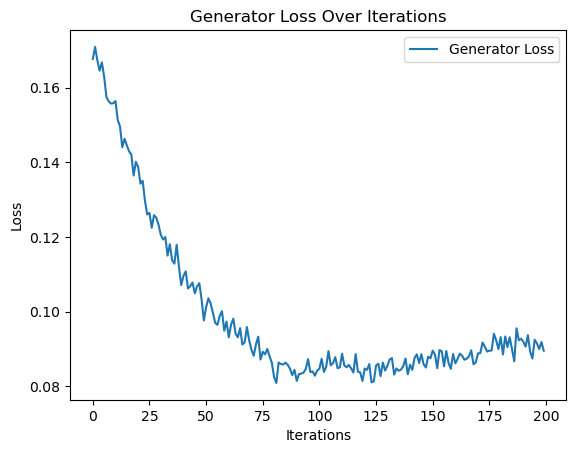

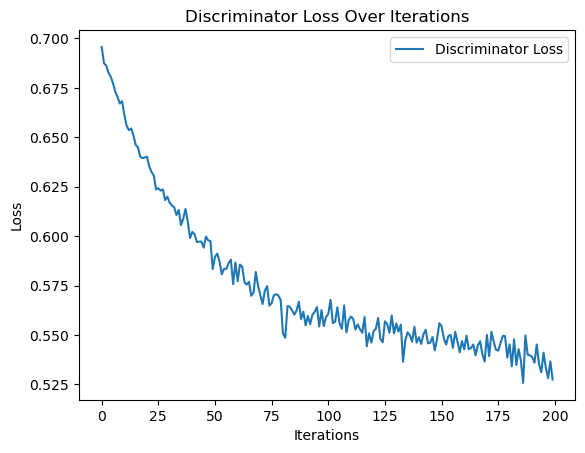

In [83]:
# Plot Generator Loss
plt.figure()
plt.plot(Gloss_list, label='Generator Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Generator Loss Over Iterations')
plt.legend()
plt.show()

# Plot Discriminator Loss
plt.figure()
plt.plot(Dloss_list, label='Discriminator Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Discriminator Loss Over Iterations')
plt.legend()
plt.show()

In [85]:
imputed_list[9].shape

(918, 11)

In [86]:
#converting the last imputed array to dataframe
data_imputed_GAIN = pd.DataFrame(imputed_data[9][9], columns=data_gain_new.columns)

In [87]:
data_imputed_GAIN.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40.0,99.181763,158.135727,0.158548,172.000000,0.000000,1.0,1.0,1.0,0.0,2.0
1,49.0,160.000000,180.000000,0.000000,156.000000,1.000000,0.0,2.0,1.0,0.0,1.0
2,37.0,130.000000,93.521545,0.000000,98.000000,0.000000,1.0,0.0,2.0,0.0,2.0
3,48.0,120.518669,214.000000,0.000000,108.000000,0.456425,0.0,0.0,1.0,0.0,1.0
4,54.0,122.472656,195.000000,0.000000,123.927933,0.000000,1.0,0.0,1.0,0.0,2.0


In [88]:
X = data_imputed_GAIN
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state = 42)

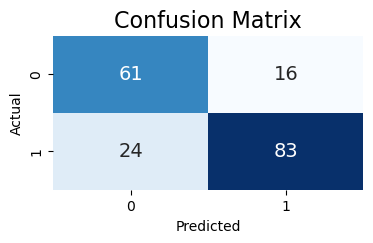

In [89]:
# Modelling and Evaluation metrics for imputed dataset
model = RandomForestClassifier(n_estimators=200,random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cf_matrix_GAIN = confusion_matrix(y_test,y_pred)

# confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cf_matrix_GAIN, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

accuracy_GAIN = accuracy_score(y_test,y_pred)
precision_GAIN = precision_score(y_test, y_pred)
recall_GAIN = recall_score(y_test, y_pred)
f1_GAIN = f1_score(y_test, y_pred)

In [90]:
print(f'Accuracy: {accuracy_GAIN:.4f}')
print(f'Precision: {precision_GAIN:.4f}')
print(f'Recall: {recall_GAIN:.4f}')
print(f'F1 Score: {f1_GAIN:.4f}')

Accuracy: 0.7826
Precision: 0.8384
Recall: 0.7757
F1 Score: 0.8058


## MIDA

In [91]:
from __future__ import division, print_function, absolute_import

In [92]:
def autoencoder_imputation(data_x, data_m, cat_index, num_index, all_levels, DAE_params, num_imputations):
    no, dim = data_x.shape
    # initial imputation
    data_x = initial_imputation(data_x, cat_index, num_index)

    data_train = np.array([])
    data_train_m = np.array([])
    ## encode cat
    if cat_index:
        data_cat = data_x[:, cat_index]
        data_cat_m = data_m[:, cat_index]
        data_cat_enc, data_cat_enc_miss = onehot_encoding(data_cat, data_cat_m, all_levels, has_miss=False)
        n_classes = list(map(lambda x: len(x), all_levels))
        data_train = data_cat_enc
        data_train_m = data_cat_enc_miss
    ## normalize num
    if num_index:
        data_num = data_x[:, num_index]
        data_num_m = data_m[:, num_index]
        data_num_norm, norm_parameters = normalization(data_num)
        data_train = np.concatenate([data_train, data_num_norm], axis=1) if data_train.size else data_num_norm
        data_train_m = np.concatenate([data_train_m, data_num_m], axis=1) if data_train_m.size else data_num_m

    # Training Parameters
    learning_rate = DAE_params["learning_rate"]
    num_steps1 = DAE_params["num_steps_phase1"]
    num_steps2 = DAE_params["num_steps_phase2"]
    batch_size = DAE_params["batch_size"]

    # Network Parameters
    num_input = data_train.shape[1]
    num_hidden_1 = data_train.shape[1] + DAE_params["theta"]  # 1st layer num features
    num_hidden_2 = data_train.shape[1] + 2 * DAE_params["theta"]  # 2nd layer num features (the latent dim)
    num_hidden_3 = data_train.shape[1] + 3 * DAE_params["theta"]

    # A random value generator to initialize weights.
    random_normal = tf.initializers.RandomNormal()

    weights = {
        'encoder_h1': tf.Variable(random_normal([num_input, num_hidden_1])),
        'encoder_h2': tf.Variable(random_normal([num_hidden_1, num_hidden_2])),
        'encoder_h3': tf.Variable(random_normal([num_hidden_2, num_hidden_3])),
        'decoder_h1': tf.Variable(random_normal([num_hidden_3, num_hidden_2])),
        'decoder_h2': tf.Variable(random_normal([num_hidden_2, num_hidden_1])),
        'decoder_h3': tf.Variable(random_normal([num_hidden_1, num_input])),
    }
    biases = {
        'encoder_b1': tf.Variable(random_normal([num_hidden_1])),
        'encoder_b2': tf.Variable(random_normal([num_hidden_2])),
        'encoder_b3': tf.Variable(random_normal([num_hidden_3])),
        'decoder_b1': tf.Variable(random_normal([num_hidden_2])),
        'decoder_b2': tf.Variable(random_normal([num_hidden_1])),
        'decoder_b3': tf.Variable(random_normal([num_input])),
    }

    # Building the encoder
    @tf.function
    def encoder(x):
        x_noise = tf.nn.dropout(x, 0.5)
        layer_1 = tf.nn.tanh(tf.add(tf.matmul(x_noise, weights['encoder_h1']),
                                       biases['encoder_b1']))
        layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                       biases['encoder_b2']))
        layer_3 = tf.nn.tanh(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                       biases['encoder_b3']))
        return layer_3

    # Building the decoder
    @tf.function
    def decoder(x):
        layer_1 = tf.nn.tanh(tf. add(tf.matmul(x, weights['decoder_h1']),
                                       biases['decoder_b1']))
        layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                       biases['decoder_b2']))
        layer_3 = tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                         biases['decoder_b3'])
        col_index = 0
        empty_G_out = True
        # apply softmax to each categorical variable
        if cat_index:
            empty_G_out = False
            output = tf.nn.softmax(layer_3[:, :n_classes[0]])
            col_index = n_classes[0]
            for j in range(1, len(n_classes)):
                output = tf.concat(values=[output, tf.nn.softmax(layer_3[:, col_index:col_index + n_classes[j]])], axis=1)
                col_index += n_classes[j]
        # apply sigmoid to all numerical variables
        if num_index:
            out_num = tf.nn.sigmoid(layer_3[:, col_index:])
            output = tf.concat(values=[output, out_num], axis=1) if not empty_G_out else out_num
        return output

    # sum up loss for each categorical variable
    @tf.function
    def dae_loss(y_pred, y_true, mask):
        loss = 0
        current_ind = 0
        # categorical loss
        if cat_index:
            for j in range(len(n_classes)):
                mask_current = mask[:, current_ind:current_ind + n_classes[j]]
                y_pred_current = y_pred[:, current_ind:current_ind + n_classes[j]]
                y_true_current = y_true[:, current_ind:current_ind + n_classes[j]]
                loss += -tf.reduce_mean(
                    input_tensor=mask_current * y_true_current * tf.math.log(mask_current * y_pred_current + 1e-8)) / tf.reduce_mean(
                    input_tensor=mask_current)
                current_ind += n_classes[j]
        # numerical loss
        if num_index:
            mask_current = mask[:, current_ind:]
            y_pred_current = y_pred[:, current_ind:]
            y_true_current = y_true[:, current_ind:]
            loss += tf.reduce_mean((mask_current * y_true_current - mask_current * y_pred_current)**2) / tf.reduce_mean(mask_current)
        return loss

    # optimizer
    @tf.function
    def optimize_step(batch_x, batch_m):
        with tf.GradientTape() as g:
            y_hat = decoder(encoder(batch_x))
            l = dae_loss(y_hat, batch_x, batch_m)

        trainable_variables = list(weights.values()) + list(biases.values())

        gradients = g.gradient(l, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        return l, y_hat

    optimizer = tf.optimizers.Adam(learning_rate=learning_rate, decay=0.0)

    # multiple imputation
    imputed_list = []
    for l in range(num_imputations):
        # Start Training
        # Training phase 1
        loss_list = []
        pbar = tqdm(range(num_steps1))
        for i in pbar:
            # create mini batch
            indices = np.arange(no)
            np.random.shuffle(indices)
            for start_idx in range(0, no - batch_size + 1, batch_size):
                batch_idx = indices[start_idx:start_idx + batch_size]
                batch_x = data_train[batch_idx, :]
                batch_m = data_train_m[batch_idx, :]

                # Run optimization op (backprop) and cost op (to get loss value)
                l, y_hat = optimize_step(batch_x, batch_m)
                pbar.set_description("loss at epoch {}: {:.3f}, phase 1".format(i, l))
                loss_list.append(l)

        imputed_data = decoder(encoder(data_train))
        imputed_data = data_train_m * data_train + (1 - data_train_m) * imputed_data

        # Training phase 2
        pbar = tqdm(range(num_steps2))
        for i in pbar:
            # create mini batch
            indices = np.arange(no)
            np.random.shuffle(indices)
            for start_idx in range(0, no - batch_size + 1, batch_size):
                batch_idx = indices[start_idx:start_idx + batch_size]
                batch_x = tf.gather(imputed_data, batch_idx, axis=0)
                batch_m = data_train_m[batch_idx, :]

                # Run optimization op (backprop) and cost op (to get loss value)
                l, y_hat = optimize_step(batch_x, batch_m)
                pbar.set_description("loss at epoch {}, phase 2: {:.3f}".format(i, l))
                loss_list.append(l)

        # get imputation
        imputed_data = decoder(encoder(imputed_data))
        imputed_data = data_train_m * data_train + (1 - data_train_m) * imputed_data

        # revert onehot and renormalize
        imputed = np.empty(shape=(no, dim))
        if cat_index:
            imputed_cat = imputed_data[:, :data_cat_enc.shape[1]]
            imputed_cat = onehot_decoding(imputed_cat, data_cat_enc_miss, all_levels, has_miss=False)
            imputed[:, cat_index] = imputed_cat
        if num_index:
            imputed_num = imputed_data[:, -data_num.shape[1]:]
            imputed_num = renormalization(imputed_num.numpy(), norm_parameters)
            imputed[:, num_index] = imputed_num
        imputed_list.append(imputed)
    return imputed_list, loss_list

In [93]:
data_mida = data_MCAR_df.copy()
cat_cols=  ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
num_cols = [ 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
data_mida_new = data_mida[num_cols]
# concatinating numerical and categorical columns
data_mida_new = pd.concat([data_mida_new, data_mida[cat_cols]],axis = 1)

In [94]:
#setting initial parameters for MIDA
DAE_parameters = {'learning_rate': 0.001,
                        'batch_size': 512,
                        'num_steps_phase1': 200,
                        'num_steps_phase2': 2,
                        'theta': 7}
num_index = list(range(0,6))
cat_index = list(range(6,11))

In [95]:
#Creating data_x and data_m matrix for mida
#data_x = Observed matrix, data_m = Missing Matrix
data_x = data_mida_new.values.astype(np.float32)
data_m = 1 - data_mida_new.isna().astype(np.float32).values

 # get all possible levels for categorical variable
all_levels = [np.unique(x) for x in data_x[:, cat_index].T]
all_levels_dict = dict(zip(data_mida_new.columns[cat_index], all_levels))

In [96]:
#Samples and iterations for mida
rmse_ls = []
num_samples = 10
num_imputations = 10
imputed_data = {i: [] for i in range(num_samples)}

In [97]:
for i in range(num_samples):
    # Assuming data_x already has missing values
    miss_data_x = data_x.copy()
    data_m = 1 - np.isnan(miss_data_x).astype(np.float32)  # Mask for missing values

    # Initial imputation
    initial_imputated_data = np.nan_to_num(miss_data_x, nan=np.nanmean(miss_data_x, axis=0))

    # Perform the imputation using the model
    imputed_list, loss_list = autoencoder_imputation(initial_imputated_data, data_m, cat_index, num_index,
                                                           all_levels, DAE_parameters, num_imputations)
    
    # Store the imputed data in memory
    for l in range(num_imputations):
        imputed_data[i].append(imputed_list[l])

    print("{} done!".format(i))

/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
loss at epoch 1, phase 2: 0.612: 100%|███████████| 2/2 [00:00<00:00, 424.01it/s]


0 done!


loss at epoch 1, phase 2: 0.572: 100%|███████████| 2/2 [00:00<00:00, 381.54it/s]


1 done!


loss at epoch 1, phase 2: 0.605: 100%|███████████| 2/2 [00:00<00:00, 402.58it/s]


2 done!


loss at epoch 1, phase 2: 0.592: 100%|███████████| 2/2 [00:00<00:00, 414.78it/s]


3 done!


loss at epoch 1, phase 2: 0.584: 100%|███████████| 2/2 [00:00<00:00, 381.82it/s]


4 done!


loss at epoch 1, phase 2: 0.614: 100%|███████████| 2/2 [00:00<00:00, 399.46it/s]


5 done!


loss at epoch 1, phase 2: 0.565: 100%|███████████| 2/2 [00:00<00:00, 405.33it/s]


6 done!


loss at epoch 1, phase 2: 0.604: 100%|███████████| 2/2 [00:00<00:00, 411.19it/s]


7 done!


loss at epoch 1, phase 2: 0.563: 100%|███████████| 2/2 [00:00<00:00, 408.68it/s]


8 done!


loss at epoch 1, phase 2: 0.545: 100%|███████████| 2/2 [00:00<00:00, 422.86it/s]


9 done!


In [98]:
#converting the last imputed array to dataframe
data_imputed_mida = pd.DataFrame(imputed_data[9][9], columns=data_mida_new.columns)

In [99]:
X = data_imputed_mida
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state = 42)

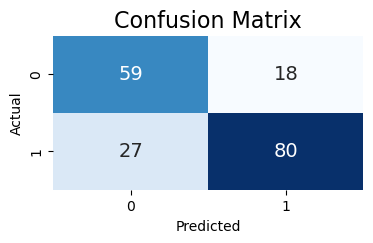

In [100]:
# Modelling and Evaluation metrics for imputed dataset
model = RandomForestClassifier(n_estimators=200,random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cf_matrix_MIDA = confusion_matrix(y_test,y_pred)

# confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cf_matrix_MIDA, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

accuracy_MIDA = accuracy_score(y_test,y_pred)
precision_MIDA = precision_score(y_test, y_pred)
recall_MIDA = recall_score(y_test, y_pred)
f1_MIDA = f1_score(y_test, y_pred)

In [101]:
print(f'Accuracy: {accuracy_MIDA:.4f}')
print(f'Precision: {precision_MIDA:.4f}')
print(f'Recall: {recall_MIDA:.4f}')
print(f'F1 Score: {f1_MIDA:.4f}')

Accuracy: 0.7554
Precision: 0.8163
Recall: 0.7477
F1 Score: 0.7805


# K-means imputation

In [102]:
data_MCAR_Kmeans = data_MCAR_df.copy()

In [103]:
#initially imputed mean values
imputer = SimpleImputer(strategy='mean')
X = data_MCAR_Kmeans
y = target


data_imputed_Kmeans = imputer.fit_transform(X)

In [104]:
#function to iteratively impute missing values
k = 3
num_iterations = 10

for _ in range(num_iterations):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(data_imputed_Kmeans)

    # Impute missing values based on cluster means
    for cluster in range(k):
        cluster_indices = np.where(clusters == cluster)
        cluster_data = data_imputed_Kmeans[cluster_indices]

        # Calculate mean of each feature in the cluster
        cluster_means = np.nanmean(cluster_data, axis=0)

        # Impute missing values in the original data
        for i in cluster_indices[0]:
            for j in range(data_imputed_Kmeans.shape[1]):
                # Check if the original data had a missing value
                if np.isnan(X.iloc[i, j]):  # Correctly access the DataFrame
                    data_imputed_Kmeans[i, j] = cluster_means[j]

data_imputed_Kmeans_df = pd.DataFrame(data_imputed_Kmeans, columns=X.columns)

/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

In [105]:
X = data_imputed_Kmeans_df
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.80,random_state = 42)

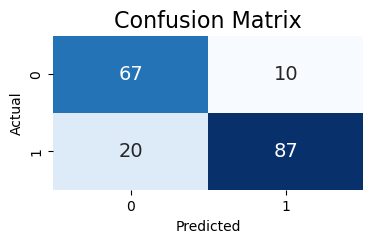

In [106]:
# Modelling and Evaluation metrics for imputed dataset
model = RandomForestClassifier(n_estimators=200,random_state = 42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cf_matrix_kmeans_impute = confusion_matrix(y_test,y_pred)

# confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cf_matrix_kmeans_impute, annot=True, fmt='g', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

accuracy_kmeans_impute = accuracy_score(y_test,y_pred)
precision_kmeans_impute = precision_score(y_test, y_pred)
recall_kmeans_impute = recall_score(y_test, y_pred)
f1_kmeans_impute = f1_score(y_test, y_pred)

In [107]:
print(f'Accuracy: {accuracy_kmeans_impute:.4f}')
print(f'Precision: {precision_kmeans_impute:.4f}')
print(f'Recall: {recall_kmeans_impute:.4f}')
print(f'F1 Score: {f1_kmeans_impute:.4f}')

Accuracy: 0.8370
Precision: 0.8969
Recall: 0.8131
F1 Score: 0.8529
